# Lab 2 Simon Palm and Erik Lindvall
Some of the results are in the prints following the code cells.

# Imports and functions

In [324]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy as copy

def find_nbhdN(config,i,j,m,n):
    nbhdN = []
    if i == 0:
        if j == 0:
            nbhdN.append(config[i+1][j])
            nbhdN.append(config[i][j+1])
        elif j != 0 and j < m-1:
            nbhdN.append(config[i+1][j])
            nbhdN.append(config[i][j-1])            
            nbhdN.append(config[i][j+1])
        elif j == m-1:
            nbhdN.append(config[i+1][j])
            nbhdN.append(config[i][j-1])            
    elif i != 0 and i < n-1:
        if j == 0:
            nbhdN.append(config[i+1][j])
            nbhdN.append(config[i-1][j])
            nbhdN.append(config[i][j+1])
        elif j != 0 and j < m-1:
            nbhdN.append(config[i+1][j])
            nbhdN.append(config[i-1][j])
            nbhdN.append(config[i][j-1])            
            nbhdN.append(config[i][j+1])
        elif j == m-1:
            nbhdN.append(config[i+1][j])
            nbhdN.append(config[i-1][j])
            nbhdN.append(config[i][j-1])           
    elif i == n-1:
        if j == 0:
            nbhdN.append(config[i-1][j])
            nbhdN.append(config[i][j+1])
        elif j != 0 and j < m-1:

            nbhdN.append(config[i-1][j])
            nbhdN.append(config[i][j-1])            
            nbhdN.append(config[i][j+1])
        elif j == m-1:
            nbhdN.append(config[i-1][j])
            nbhdN.append(config[i][j-1])  
    return nbhdN   




def periodicBC(i,m):
    if i > m-1:
        ind = 0
    elif i < 0:
        ind = m-1
    else:
        ind = i
    return ind

def find_nbhdP(config,i,j,m,n):
    nbhdP = []
    nbhdP.append(config[periodicBC(i+1,n)][j])
    nbhdP.append(config[periodicBC(i-1,n)][j])
    nbhdP.append(config[i][periodicBC(j-1,m)])            
    nbhdP.append(config[i][periodicBC(j+1,m)])
    return nbhdP

def GHstep(config,m,n,Estates,Nstates,type ='DC'):
    new_config = np.zeros([1,n,m]).astype(int)
    for i in range(n): #rows (m)
        for j in range(m):
            if config[i][j] == 0:
                if type == 'DC':
                  nbhd = find_nbhdN(config,i,j,m,n)
                elif type == 'P':
                   nbhd = find_nbhdP(config,i,j,m,n)
               # print(nbhd)
                for nb in nbhd:
                    if nb in Estates:
                        new_config[0][i][j] = config[i][j] + 1
                        break
            elif config[i][j] == Nstates-1:
                new_config[0][i][j] = 0
            
            else: 
                new_config[0][i][j] = config[i][j] + 1
    return new_config   



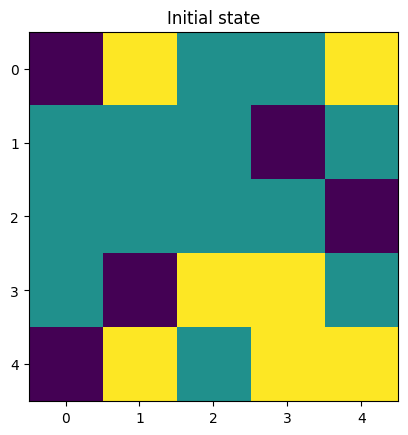

The eventual periodicity of this state is 4


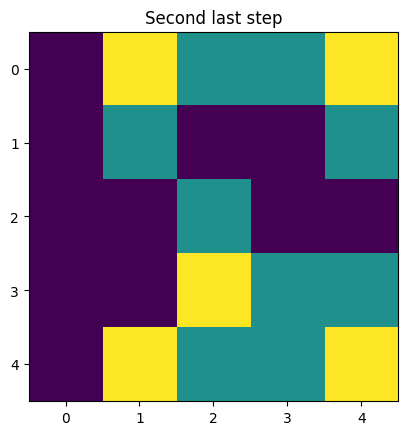

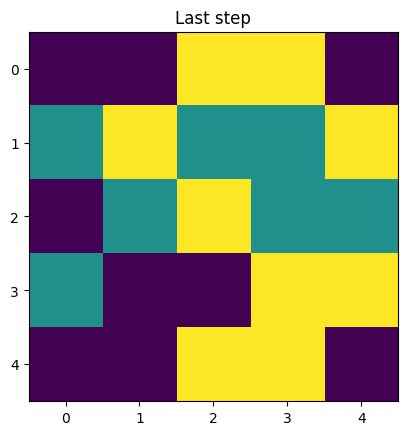

The cardinality of the set of configurations =  847288609443


In [325]:
# GHCA

n = 5
m = 5
Nstates = 3
Estates = [1]
# Initial state nxm np array with random values
Vinit = np.random.randint(0,Nstates,[1,n,m])

# Draw the initial state in colour
plt.imshow(Vinit[0,:,:])
plt.title('Initial state')
plt.show()

t = 100
V = Vinit
plt.imshow(V[0,:,:])
cond = True
period = 0
Vperiod = np.zeros([1,n,m]).astype(int)
for i in range(t):
    V = np.append(V,GHstep(V[i],m,n,Estates,Nstates,'P'),axis=0)
Vperiod[0] = V[-1]
periodicity = 0

for i in  reversed(range(t)):
    Vtemp = np.zeros([1,n,m]).astype(int)
    Vtemp[0] = V[i]
    Vperiod = np.append(Vperiod,Vtemp,axis=0)
    periodicity += 1
    if np.linalg.norm(V[i] - V[-1]) == 0:
        break
       
print(f'The eventual periodicity of this state is {periodicity}') # Usually is 3,4 or 7 if it is alive

plt.imshow(V[-2,:,:])
plt.title('Second last step')
plt.show()

plt.imshow(V[-1,:,:])
plt.title('Last step')
plt.show()

print(f'The cardinality of the set of configurations =  {Nstates**(m*n)}')

# See if perturbed initial state converges to same orbit
The code in the previous cell must have resulted in a alive solution for the code to work. Tries to load a state which is known to be attractor.
They sometimes converge to the same orbit, but not always, depending on initial state.

In [326]:
Vtemp = np.zeros([1,n,m]).astype(int)
try:
   Vtemp[0] = np.load('Vconv.npy')
except:
   Vtemp[0] = V[-1]

Cp = copy(Vtemp) #Assuming previous code converged to a periodic set
Cp_pert = copy(Vtemp)
Cp_pert[0][3][3] = (Cp_pert[0][3][3]+1)%Nstates
Cp_pert[0][0][4] = (Cp_pert[0][0][4]+1)%Nstates
Cp_pert[0][2][4] = (Cp_pert[0][2][4]+1)%Nstates
for i in range(t):
    Cp_pert = np.append(Cp_pert,GHstep(Cp_pert[i],m,n,Estates,Nstates,'P'),axis=0)
    if np.linalg.norm(Cp[0]-Cp_pert[i]) == 0:
      print(f'The perturbed configuration converged to the same orbit!!!')
      try:
         Vconv = np.load('Vconv.npy') # Save the converged orbit if not already saved
      except:
         Vconv = np.save('Vconv.npy',V[-1])

      break

The perturbed configuration converged to the same orbit!!!


# Check additive

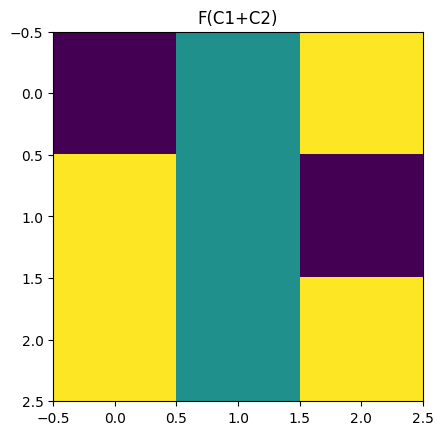

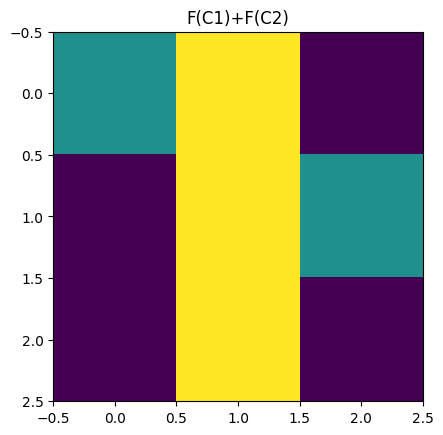

They are not the same, therefore not additive.


In [327]:
def conf_add(V,V2,N):
    # Get dim of V
    dummy,n,m = V.shape[:]
    Vresult = np.zeros([1,n,m]).astype(int)

    for i in range(n):
        for j in range(m):
            # Print V[i,j] + V2[i,j]
            Vresult[0][i][j] += np.mod(V[0][i][j] + V2[0][i][j],N)
    return Vresult

Nstates = 3
n = 3
m = 3
Estates = [1]
C1 = np.random.randint(0,Nstates,[1,n,m])
C2 = np.random.randint(0,Nstates,[1,n,m])
C3 = conf_add(C1,C2,Nstates)

FC1 = GHstep(C1[0],m,n,Estates,Nstates,'P')
FC2 = GHstep(C2[0],m,n,Estates,Nstates,'P')
FC3 = GHstep(C3[0],m,n,Estates,Nstates,'P')
FC3_2 = conf_add(FC1,FC2,Nstates)
plt.imshow(FC3[0])
plt.title('F(C1+C2)')
plt.show()

plt.imshow(FC3_2[0])
plt.title('F(C1)+F(C2)')
plt.show()

# They are not the same
print('They are not the same, therefore not additive.')